In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [ ]:
def F1(u, N, tau, T, A, e):
    x_1T = tau*tau*np.dot(np.dot(A, u), e) + 2.0*T + 3.0
    x_2T = tau*np.dot(u, e) + 2.0
    return x_1T*x_1T + x_2T*x_2T

In [ ]:
def F2(u, N, tau, e):
    return tau*np.dot(u*u, e)

In [ ]:
def conv_J(u, tau, T, alpha, N, A, e):
    x_1T = tau * tau * np.dot(np.dot(A, u), e) + 2.0*T + 3.0
    x_2T = tau * np.dot(u, e) + 2.0
    return alpha*(x_1T*x_1T + x_2T*x_2T) + (1.0 - alpha)*(tau*np.dot(u*u, e))

In [ ]:
def my_minimize(N, tau, T, alpha, A, e):
    const = 0.0#-2.5 / float(N)
    u0 = np.array([const] * N)
    #u0 = np.array([   2.0*i/float(N-1) - 1.0     for i in range(0, N)])
    my_args = (tau, T, alpha, N, A, e)
    mybounds = [(-1, 1)]*N
    # Only for CG, BFGS, Newton-CG, L-BFGS-B, TNC, SLSQP, dogleg, trust-ncg, trust-krylov, trust-exact and trust-constr.
    res = minimize(conv_J, u0, method='L-BFGS-B', args=my_args, bounds=mybounds, options={'disp': False}) #'disp': True   jac=grad_J,
    return res.x

In [ ]:
def minimize_with_parameters(N, T, tau, NumAlpha):
    e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, N)])
    A = np.array([[1.0 if i > j else 0.0 for j in range(0, N)] for i in range(0, N)])
    #A[0, 0] = 1.0
    for i in range(1, N):
        A[i, 0] = 0.5
        A[i, i] = 0.5
    
    alpha_mass = np.linspace(0.0, 1.0, NumAlpha)
    u_mass = []
    for alpha in alpha_mass:
        u = my_minimize(N, tau, T, alpha, A, e)
        u_mass.append(u)
    return u_mass

In [ ]:
def minimize_with_one_parameter(N, T, tau, Alpha):
    e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, N)])
    A = np.array([[1.0 if i > j else 0.0 for j in range(0, N)] for i in range(0, N)])
    #A[0, 0] = 1.0
    for i in range(1, N):
        A[i, 0] = 0.5
        A[i, i] = 0.5
    return my_minimize(N, tau, T, Alpha, A, e)

In [ ]:
def get_F_values(U, N, tau, T):
    e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, N)])
    A = np.array([[1.0 if i > j else 0.0 for j in range(0, N)] for i in range(0, N)])
    for i in range(1, N):
        A[i, 0] = 0.5
        A[i, i] = 0.5
    F1val, F2val = [], []
    for u in U:
        F1val.append(F1(u, N, tau, T, A, e))
        F2val.append(F2(u, N, tau, e))
    return (F1val, F2val)

In [ ]:
def get_x1_value(u, N, tau, T):
    x1_mass = [3.0]
    for k in range(1, N):
        tmp_e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, k+1)])
        tmp_A = np.array([[1.0 if i > j else 0.0 for j in range(0, k+1)] for i in range(0, k+1)])
        for r in range(1, k+1):
            tmp_A[r, 0] = 0.5
            tmp_A[r, r] = 0.5
        x1_mass.append(tau*tau*np.dot(np.dot(tmp_A, u[0:k+1]), tmp_e) + 2.0*k*tau + 3.0)
    return np.array(x1_mass)
def get_x2_value(u, N, tau):
    x2_mass = [2.0]
    for k in range(1, N):
        tmp_e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, k+1)])
        x2_mass.append(tau*np.dot(u[0:k+1], tmp_e) + 2.0)
    return np.array(x2_mass)

# Рассмотрим случай $\lambda = 1$

In [ ]:
tau = 0.01

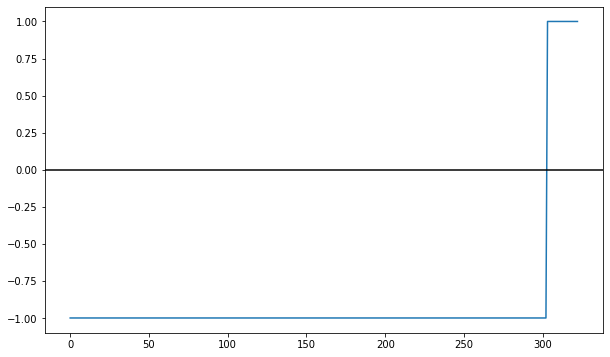

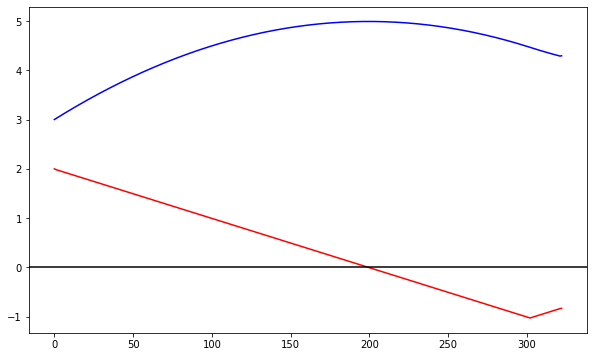

In [ ]:
T =  1.0 + 5**0.5
N = int(T/tau)
res = minimize_with_one_parameter(N, T, tau, 1.0)
x1 = get_x1_value(res, N, tau, T)
x2 = get_x2_value(res, N, tau)
fig1, ax1 = plt.subplots(figsize=(10, 6))
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax1.plot(res)
ax2.plot(x1, color='blue')
ax2.plot(x2, color='red')
ax1.axhline(y=0, color='black')
ax2.axhline(y=0, color='black')

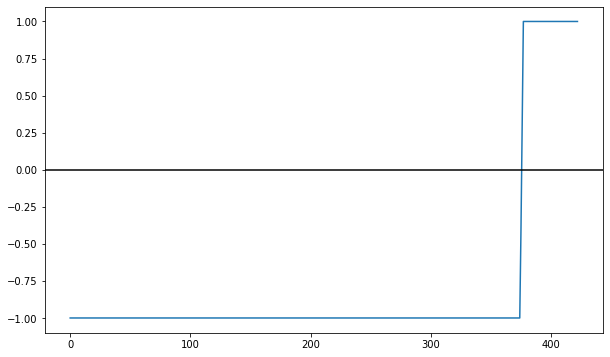

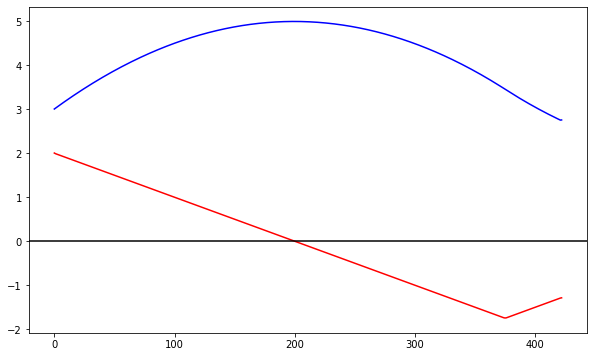

In [ ]:
T =  2.0 + 5**0.5
N = int(T/tau)
res = minimize_with_one_parameter(N, T, tau, 1.0)
x1 = get_x1_value(res, N, tau, T)
x2 = get_x2_value(res, N, tau)
fig1, ax1 = plt.subplots(figsize=(10, 6))
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax1.plot(res)
ax2.plot(x1, color='blue')
ax2.plot(x2, color='red')
ax1.axhline(y=0, color='black')
ax2.axhline(y=0, color='black')

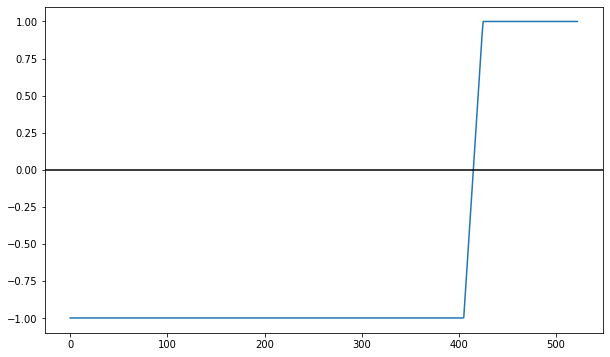

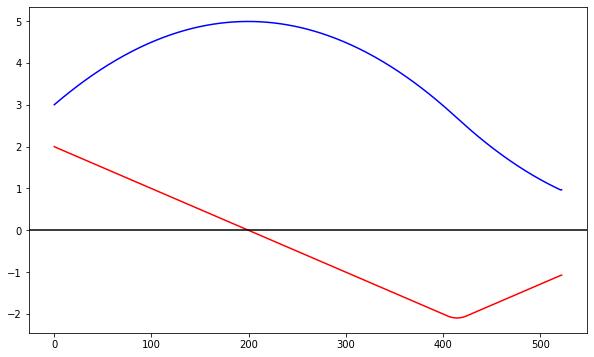

In [ ]:
T =  3.0 + 5**0.5
N = int(T/tau)
res = minimize_with_one_parameter(N, T, tau, 1.0)
x1 = get_x1_value(res, N, tau, T)
x2 = get_x2_value(res, N, tau)
fig1, ax1 = plt.subplots(figsize=(10, 6))
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax1.plot(res)
ax2.plot(x1, color='blue')
ax2.plot(x2, color='red')
ax1.axhline(y=0, color='black')
ax2.axhline(y=0, color='black')

## начиная с времени примерно $T = 4.13 + \sqrt{2}$ наша тележка находится почти у точки $(0, 0)$ 
Меньше времени не хватает из за разворота и того, что управление ограничено единицей


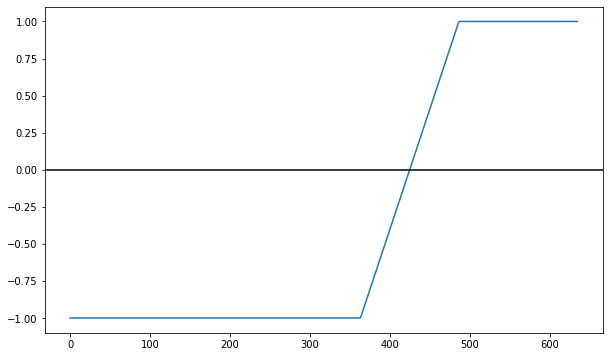

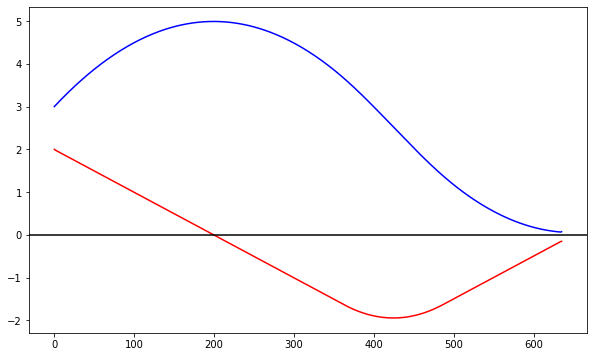

In [ ]:
T =  4.13 + 5**0.5
N = int(T/tau)
res = minimize_with_one_parameter(N, T, tau, 1.0)
x1 = get_x1_value(res, N, tau, T)
x2 = get_x2_value(res, N, tau)
fig1, ax1 = plt.subplots(figsize=(10, 6))
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax1.plot(res)
ax2.plot(x1, color='blue')
ax2.plot(x2, color='red')
ax1.axhline(y=0, color='black')
ax2.axhline(y=0, color='black')